## Final Project Submission

Please fill out: 
* Student name: Mathew Kiprotich
* Student pace: / full time
* Scheduled project review date/time: 03/18/2024
* Instructor name: Nikita Njoroge
* Blog post URL:


## FILM PERFOMANCE AT BOX OFFICE


 
  # INTRO

**Overview**

The project's main aim is to provide insights to assist Microsoft in entering and succeeding in the movie industry. We will conduct exploratory data analysis to discover useful information that can guide decisions on the kinds of films Microsoft should produced

 # OBJECTIVES

**Overal goals** 

We will explore and analyze the types of movies that are currently popular at the box office. Then, we'll use what we find to decide what kinds of movies Microsoft should make by:

1. loading datasets into pandas
2. Retreving data from a DataFrame
3. Data preparation and cleaning
4. Exploratory aanalysis
5. Data visualization

  # DATA
 
Datasets are stored in 'ZippedData' folder which were sourced from:

        Box Office MojoLinks
            born.movie_gross.csv.gz
        IMDLINKS
            im.db.zip
        Rotten TomatoesLinks
            rt.movies_info.tsv.gz
        TheMovieDBLinks
            tmdb.movies.csv.gz
        The Numbers
            tn.movie_budgets.csv.gz

Importing relevant libraries
    import paandas, numpy, csv with their aliases



In [432]:
#importing libraries
import pandas as pd
import sqlite3
import seaborn as sns
import csv
import numpy as np
from datetime import datetime



In [433]:
#importing data visualization tools
import matplotlib.pyplot as plt

%matplotlib inline 

**Loading Datasets**

  movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

  movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

  tmd = pd.read_csv('zippedData/tmdb.movies.csv',index_col=0)

  reviews = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t',encoding='unicode_escape')
  conn = sqlite3.connect('zippedData/im.db')
  
  movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter ='\t', encoding='unicode_escape' )

In [434]:
# Load the data from 'tn.movie_budgets.csv' into a dataframe
import pandas as pd

# Read the CSV file into a DataFrame
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movies_budget


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [435]:
#load data from 'bom.movie_gross.csv.gz' into dataframe

bom_movie = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie.head(5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [436]:
#load data from 'tmdb.movies.csv' into Dataframe
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz',index_col=0)
tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [437]:
#load data from 'zippedData/rt.reviews.tsv' from Dataframe
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t',encoding='unicode_escape')
conn = sqlite3.connect('zippedData/im.db')
reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [438]:
#load data from 'zippedData/rt.movie_info.tsv' from dataframe
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter ='\t', encoding='unicode_escape' )
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [439]:
# import the zipfile module to help unzip the data
import zipfile

# extract files from 'im.db.zip' to the current working directory
with zipfile.ZipFile('zippedData/im.db.zip','r') as zip_ref:
    zip_ref.extractall(path='zippedData')

# creating a connection to the database
conn = sqlite3.connect('zippedData/im.db')

In [440]:
movie_basics = pd.read_sql("SELECT* FROM movie_basics;",conn)
movie_rating = pd.read_sql("SELECT* FROM movie_ratings;",conn)

print(movie_basics)

         movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2     

In [441]:
print(movie_rating)

         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


 # Data cleaning

 **movies rating data**
 


In [442]:
#To print the first 5 rows
movie_rating.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [443]:
#To check the summary of the data
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [444]:
#To check whether the data has null values
movie_rating.isnull().any()

movie_id         False
averagerating    False
numvotes         False
dtype: bool

In [445]:
#To check for duplicated values
movie_rating.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

**Cleaning bom data**

In [446]:
#cleaning bom
# Check the first 5 rows
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [447]:
#A summary of bom movie
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [448]:
# summary of the bom structure and content.
summary = bom_movie.describe()
print(summary)


       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000


In [449]:
#To check for duplicates
duplicates = bom_movie.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool


In [450]:
#To check for null values
null_count = bom_movie.isnull().sum()
print(null_count)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [451]:
# To check for total count of null values
total_count = bom_movie.shape[0]
total_count

3387

In [452]:
#To get the percentage of null values
percentage_count =(null_count/total_count)*100 
percentage_count

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [453]:
# Drop missing values from studio because they are only 5
bom_movie.dropna(subset= ['studio'], inplace = True)

In [454]:
#To check the summary of bom movie after dropping studio column.
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [455]:
#Convert the data in that column from a string representation of a number with commas
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].str.replace(',','')

In [456]:
# Change data type for column foreign_gross  to float
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].astype(float)

In [457]:
#To check the summary of bom to see if the changes made have reflected
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [458]:
#To replace missing values with the mean.
bom_movie['foreign_gross'].fillna(bom_movie['foreign_gross'].mean(), inplace = True)

In [459]:
#To check the summary of the data if foreign gross column has been replaced with the mean
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


**Cleaning Tmdb movies**

In [460]:
#To check the first 5 rows in the columns 
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [461]:
#Summary of the data
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [462]:
#Parsing a function to check for duplicates in the ID column 

def duplicates(data, column):
    # Count occurrences of each value in the column
    value_counts = data[column].value_counts()
    
    # Check if there are any duplicates
    duplicates_count = (value_counts > 1).sum()
    
    if duplicates_count == 0:
        print(f"The column {column.title()} has no duplicates.")
    else:
        total_duplicates = (value_counts - 1).sum()  # Subtract 1 from each count to get the total number of duplicates
        duplicates_percentage = np.round((total_duplicates / len(data)) * 100, 3)
        print(f"The column {column.title()} has {total_duplicates} duplicated rows.")
        print(f"This constitutes {duplicates_percentage}% of the data set.")


duplicates(tmdb, 'id')


The column Id has 1020 duplicated rows.
This constitutes 3.847% of the data set.


This code snippet will achieves the desired outcome of removing duplicate rows from the 'tmdb' DataFrame based on the 'id' column, while retaining only the first occurrence of each 'id' value

In [463]:
#To check the summary of data
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [464]:
# A descriptive statistics of tmdb movies data
tmdb.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


Cleaning movie budget data

In [465]:
#To generate the first 5 rows of movie budget
movies_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [466]:
#To get a summary of the data
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [467]:
# checking for duplicates in the 'movie' column of the 'movies_budget' DataFrame.



def duplicates(data, column):
    # Count occurrences of each value in the column
    value_counts = data[column].value_counts()
    
    # Check if there are any duplicates
    has_duplicates = len(value_counts) < len(data)
    
    if not has_duplicates:
        print(f"The column {column.title()} has no duplicates.")
    else:
        total_duplicates = len(data) - len(value_counts)
        duplicates_percentage = np.round((total_duplicates / len(data)) * 100, 3)
        print(f"The column {column.title()} has {total_duplicates} duplicated rows.")
        print(f"This constitutes {duplicates_percentage}% of the data set.")


duplicates(movies_budget, 'movie')


The column Movie has 84 duplicated rows.
This constitutes 1.453% of the data set.


In [468]:
#checking for duplicates in the 'id' column of the 'movie_budget' DataFrame.

def duplicates(data, column):
    # Count occurrences of each value in the column
    value_counts = data[column].value_counts()
    
    # Check if there are any duplicates
    has_duplicates = len(value_counts) < len(data)
    
    if not has_duplicates:
        print(f"The column {column.title()} has no duplicates.")
    else:
        total_duplicates = len(data) - len(value_counts)
        duplicates_percentage = np.round((total_duplicates / len(data)) * 100, 3)
        print(f"The column {column.title()} has {total_duplicates} duplicated rows.")
        print(f"This constitutes {duplicates_percentage}% of the data set.")


duplicates(movies_budget, 'id')


The column Id has 5682 duplicated rows.
This constitutes 98.27% of the data set.


In [469]:
#Dropping duplicated columns
movies_budget.drop_duplicates(subset= "movie", keep="first", inplace=True)

In [470]:
#To get summary of statistics after dropping duplicates
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5698 non-null   int64 
 1   release_date       5698 non-null   object
 2   movie              5698 non-null   object
 3   production_budget  5698 non-null   object
 4   domestic_gross     5698 non-null   object
 5   worldwide_gross    5698 non-null   object
dtypes: int64(1), object(5)
memory usage: 311.6+ KB


Cleaning data from reviews

In [471]:
#This will display the last 10 rows of the DataFrame reviews
reviews.tail(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"
54423,2000,"Despite the title, Wasabi isn't so spicy.",C,rotten,NaN,0,E! Online,"September 27, 2002"
54424,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002"
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [472]:
# summary information about the DataFrame reviews
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [473]:
# count of missing values in each column of the DataFrame reviews
reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [474]:
#count of duplicate rows in the DataFrame reviews
reviews.duplicated().sum()

9

In [475]:
#code will remove rows with any missing values from the DataFrame reviews and display the first 10 rows of the modified DataFrame.
reviews.dropna(axis=0, inplace=True)
reviews.head(10)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
13,3,The anger over the injustice of the financial ...,B,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013"
14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012"
15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012"
16,3,For one of the smartest films I've seen in a w...,4/5,fresh,Patrick Kolan,0,Shotgun Cinema,"September 26, 2012"
17,3,Its major problem is that it's not cinematic.,B,fresh,Dennis Schwartz,0,Ozus' World Movie Reviews,"September 25, 2012"


IMDB dataset

In [476]:
# Create a cursor object to execute SQL queries against the database and perform various operations such as fetching data, creating tables, inserting records
cur = conn.cursor()

In [477]:
#table_names will contain a list of tuples, where each tuple contains the name of a table in the database
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [478]:
#code reads all columns from the 'movie_basics' table in the SQLite database and stores the result in the DataFrame moviebasics and diplays the last 10 rows in DataFrame


# 'conn' is the SQLite connection object established earlier
moviebasics = pd.read_sql_query("""
    SELECT * 
    FROM movie_basics
    ;
""", conn)

moviebasics.tail(10)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [479]:
#code reads all columns from the 'movie_ratings' table in the SQLite database and stores the result in the DataFrame movieratings


movieratings = pd.read_sql_query("""
    SELECT * 
    FROM movie_ratings
    ;
""", conn)

movieratings.tail(10)


,movie_id,averagerating,numvotes
73846,tt9691896,6.3,21
73847,tt9708284,4.9,19
73848,tt9722952,7.0,6
73849,tt9768966,8.6,27
73850,tt9783738,7.4,7
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [480]:
#code performs the SQL query, retrieves the specified columns from both tables, and joins them based on the 'movie_id' column

ratings = pd.read_sql_query("""
    SELECT primary_title, movie_id, start_year, runtime_minutes, genres, averagerating, numvotes
    FROM movie_basics
    JOIN movie_ratings
    USING(movie_id)
    LIMIT 10
    ;
""", conn)

ratings


,primary_title,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,tt0066787,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,tt0069049,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,tt0069204,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,tt0100275,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,Bigfoot,tt0112502,2017,NaN,"Horror,Thriller",4.1,32
6,Joe Finds Grace,tt0137204,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,tt0146592,2010,136.0,Drama,6.8,451
8,So Much for Justice!,tt0154039,2010,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,tt0159369,2013,180.0,Documentary,7.6,53


In [481]:
# code reads all columns from the 'movie_akas' table in the SQLite database and stores the result in the DataFrame movie_akas
movie_akas = pd.read_sql_query("""SELECT * 
FROM movie_akas
;""",conn)

movie_akas.tail(10)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
331693,tt9726638,3,Qi Tian Da Sheng Huo Yan Shan,CN,yue,imdbDisplay,None,0.0
331694,tt9755806,1,Big Shark,US,None,None,None,0.0
331695,tt9755806,2,Большая Акула,RU,None,None,None,0.0
331696,tt9755806,3,Big Shark,None,None,original,None,1.0
331697,tt9827784,1,Sayonara kuchibiru,JP,None,None,None,0.0
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,None,0.0


In [482]:
#code will provid the unique languages in the 'language' column of the DataFrame movie_akas and also counts the occurrences of each language
# Find unique languages
unique_languages = movie_akas['language'].unique()

# Display unique languages
print("Unique Languages:", unique_languages)

# Count occurrences of each language and display the top 10
language_counts = movie_akas['language'].value_counts().head(10)
print("\nLanguage Counts (Top 10):")
print(language_counts)


Unique Languages: ['bg' None 'he' 'fr' 'tr' 'ka' 'ta' 'te' 'en' 'sv' 'hr' 'de' 'hi' 'sl'
 'ca' 'fa' 'es' 'ml' 'cmn' 'yue' 'qbp' 'cs' 'ar' 'ms' 'nl' 'qbn' 'tl' 'mr'
 'id' 'ga' 'th' 'bs' 'bn' 'sr' 'sk' 'et' 'it' 'hu' 'da' 'el' 'pt' 'fi'
 'no' 'ru' 'uk' 'ro' 'lt' 'ur' 'gsw' 'mi' 'az' 'eu' 'la' 'gl' 'af' 'kn'
 'pl' 'yi' 'wo' 'zu' 'xh' 'st' 'tn' 'iu' 'vi' 'cy' 'ko' 'fro' 'gu' 'mk'
 'ps' 'pa' 'zh' 'ja' 'gd' 'ku' 'qal']

Language Counts (Top 10):
language
en     22895
tr      3847
bg      3609
fr      3576
he      2680
sv       965
cmn      727
fa       482
hi       307
yue      286
Name: count, dtype: int64


In [483]:
#code will read data from the 'rt.movie_info.tsv' file, which is a tab-separated values (TSV) file, and stores the result in a DataFrame named movie_info


# Read data from the TSV file
movies_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', encoding='unicode_escape')

# Display the DataFrame
movies_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [484]:
#movie_info.isna().sum() will calculate the number of missing values in each column of the DataFrame movie_info
missing_values = movies_info.isna().sum()
print(missing_values)


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


In [485]:
#code will drop rows with any missing values (NaN) from the DataFrame movie_info and modifies the DataFrame in place by setting inplace=True
movies_info.dropna(inplace=True)


In [486]:
#code will display a summary of the DataFrame movie_info, providing information about the non-null counts and data types of each column
movies_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [487]:
# code will display the first 10 rows of the DataFrame movies_info, 
movies_info.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
19,26,A comic series of short vignettes build on one...,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,"May 14, 2004","Sep 21, 2004",$,"1,971,135",96 minutes,MGM
29,41,"Ken Loach directs Sweet Sixteen, a gritty dram...",R,Drama,Ken Loach,Paul Laverty,"May 16, 2003","Oct 7, 2003",$,"201,010",106 minutes,Lions Gate Films
48,61,Death once again shows he's determined to get ...,R,Action and Adventure|Drama|Horror|Mystery and ...,James Wong,James Wong|Glen Morgan,"Feb 10, 2006","Jul 25, 2006",$,"54,100,000",93 minutes,New Line Cinema
61,77,"Until he was downsized, affable, amiable Larry...",PG-13,Comedy|Drama,Tom Hanks,Tom Hanks|Nia Vardalos,"Jul 1, 2011","Nov 15, 2011",$,"35,565,975",99 minutes,Universal Pictures
69,87,"""Mao's Last Dancer"" is the inspiring true stor...",PG,Art House and International|Drama|Musical and ...,Bruce Beresford,Jan Sardi,"Aug 20, 2010","May 3, 2011",$,"4,806,750",117 minutes,Samuel Goldwyn Films


MERGING DATASETS

In [488]:
# Renaming the column 'title' to 'movie' in the DataFrame bom_movie
bom_movie.rename(columns={'title':'movie'}, inplace=True)

# Renaming the column 'original_title' to 'movie' in the DataFrame tmdb
tmdb.rename(columns={'original_title':'movie'}, inplace=True)

# Renaming the column 'original_title' to 'movie' in the DataFrame moviebasics
moviebasics.rename(columns={'original_title':'movie'}, inplace=True)



In [489]:
# Merging the movies_budget DataFrame and movies_gross DataFrame based on the 'movie' column
# Using an inner join to retain only the rows that have matching 'movie' values in both DataFrames
df_budget_and_bom = movies_budget.merge(bom_movie, how='inner', on='movie')


In [490]:
# Getting the shape number of rows and columns of the merged DataFrame df_budget_and_bom
df_budget_and_bom.shape


(1237, 10)

Merging tmd dataframe with the moviebasics table

In [491]:
# Merging the tmd DataFrame and moviebasics DataFrame based on the 'movie' column
# Using an inner join to retain only the rows that have matching 'movie' values in both DataFrames
# This merge operation is done to get common information, including languages, between the two datasets
popularity_ratings_df = tmdb.merge(moviebasics, how='inner', on='movie')


In [492]:
# Getting the shape number of rows and columns of the merged DataFrame popularity_ratings_df(tuple no r,c)
popularity_ratings_df.shape


(21078, 14)

In [493]:
# Merging the DataFrames df_budget_and_bom and popularity_ratings_df based on the 'movie' column
# Using an inner join to retain only the rows that have matching 'movie' values in both DataFrames
# This merge operation combines budget, bom, popularity, and ratings information for movies
final_df = pd.merge(df_budget_and_bom, popularity_ratings_df, how='inner', on='movie')

# Displaying the first 5 rows of the merged DataFrame final_df
final_df.head(5)


,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,...,popularity,release_date_y,title,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,241100000.0,804600000.0,2011,...,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",BV,459000000.0,946400000.0,2015,...,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",BV,678800000.0,1369.5,2018,...,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",WB,229000000.0,428900000.0,2017,...,34.953,2017-11-17,Justice League,6.2,7510,tt0974015,Justice League,2017,120.0,"Action,Adventure,Fantasy"
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",WB,229000000.0,428900000.0,2017,...,34.953,2017-11-17,Justice League,6.2,7510,tt0974015,Justice League,2017,120.0,"Action,Adventure,Fantasy"


In [494]:
final_df.shape

(1890, 23)

In [495]:
# Retrieving the column names of the DataFrame final_df as a list
list(final_df.columns)


['id_x',
 'release_date_x',
 'movie',
 'production_budget',
 'domestic_gross_x',
 'worldwide_gross',
 'studio',
 'domestic_gross_y',
 'foreign_gross',
 'year',
 'genre_ids',
 'id_y',
 'original_language',
 'popularity',
 'release_date_y',
 'title',
 'vote_average',
 'vote_count',
 'movie_id',
 'primary_title',
 'start_year',
 'runtime_minutes',
 'genres']

In [496]:
# Dropping the unnecessary columns from the DataFrame final_df
# Columns 'id_x', 'release_date_x', 'domestic_gross_x', 'domestic_gross_y', 'genre_ids', 'id_y', 'release_date_y', 'movie_id', 'primary_title', 'start_year' are dropped
final_df.drop(columns=['id_x', 'release_date_x', 'domestic_gross_x', 'domestic_gross_y', 'genre_ids', 'id_y', 'release_date_y', 'movie_id', 'primary_title', 'start_year'], inplace=True)

# Displaying the first 5 rows of the modified DataFrame final_df
final_df.head(5)


,movie,production_budget,worldwide_gross,studio,foreign_gross,year,original_language,popularity,title,vote_average,vote_count,runtime_minutes,genres
0,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875",BV,804600000.0,2011,en,30.579,Pirates of the Caribbean: On Stranger Tides,6.4,8571,136.0,"Action,Adventure,Fantasy"
1,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963",BV,946400000.0,2015,en,44.383,Avengers: Age of Ultron,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
2,Avengers: Infinity War,"$300,000,000","$2,048,134,200",BV,1369.5,2018,en,80.773,Avengers: Infinity War,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
3,Justice League,"$300,000,000","$655,945,209",WB,428900000.0,2017,en,34.953,Justice League,6.2,7510,120.0,"Action,Adventure,Fantasy"
4,Justice League,"$300,000,000","$655,945,209",WB,428900000.0,2017,en,34.953,Justice League,6.2,7510,120.0,"Action,Adventure,Fantasy"


In [497]:
# Viewing the last 10 rows of the DataFrame final_df
final_df.tail(10)


,movie,production_budget,worldwide_gross,studio,foreign_gross,year,original_language,popularity,title,vote_average,vote_count,runtime_minutes,genres
1880,Compliance,"$270,000","$830,700",Magn.,7.495490e+07,2012,en,6.930,Compliance,6.4,340,90.0,"Biography,Crime,Drama"
1881,Like Crazy,"$250,000","$3,728,400",ParV,3.360000e+05,2011,en,10.091,Like Crazy,6.5,638,86.0,"Drama,Romance"
1882,Like Crazy,"$250,000","$3,728,400",ParV,3.360000e+05,2011,en,10.091,Like Crazy,6.5,638,NaN,Drama
1883,The Canyons,"$250,000","$62,375",IFC,7.495490e+07,2013,en,6.937,The Canyons,4.3,134,99.0,"Drama,Thriller"
1884,Another Earth,"$175,000","$2,102,779",FoxS,4.560000e+05,2011,en,10.030,Another Earth,6.7,853,92.0,"Drama,Romance,Sci-Fi"
1885,Sound of My Voice,"$135,000","$429,448",FoxS,7.495490e+07,2012,en,7.212,Sound of My Voice,6.4,169,85.0,"Drama,Mystery,Sci-Fi"
1886,Your Sister's Sister,"$120,000","$3,090,593",IFC,7.495490e+07,2012,en,7.115,Your Sister's Sister,6.6,192,90.0,"Comedy,Drama"
1887,The Gallows,"$100,000","$41,656,474",WB (NL),2.020000e+07,2015,en,9.166,The Gallows,4.8,591,81.0,"Horror,Mystery,Thriller"
1888,A Ghost Story,"$100,000","$2,769,782",A24,7.495490e+07,2017,en,11.886,A Ghost Story,7.0,906,92.0,"Drama,Fantasy,Romance"
1889,Tiny Furniture,"$50,000","$424,149",IFC,7.495490e+07,2010,en,6.695,Tiny Furniture,5.9,82,98.0,"Comedy,Drama,Romance"


In [498]:
# Dropping the columns 'title' and 'original_language' from the DataFrame final_df
final_df.drop(columns=['title', 'original_language'], inplace=True)

# Displaying the first 5 rows of the modified DataFrame final_df
final_df.head(5)


,movie,production_budget,worldwide_gross,studio,foreign_gross,year,popularity,vote_average,vote_count,runtime_minutes,genres
0,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875",BV,804600000.0,2011,30.579,6.4,8571,136.0,"Action,Adventure,Fantasy"
1,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963",BV,946400000.0,2015,44.383,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
2,Avengers: Infinity War,"$300,000,000","$2,048,134,200",BV,1369.5,2018,80.773,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
3,Justice League,"$300,000,000","$655,945,209",WB,428900000.0,2017,34.953,6.2,7510,120.0,"Action,Adventure,Fantasy"
4,Justice League,"$300,000,000","$655,945,209",WB,428900000.0,2017,34.953,6.2,7510,120.0,"Action,Adventure,Fantasy"


In [499]:

# Counting the number of unique values in each column of the DataFrame final_df
final_df.nunique()


movie                1129
production_budget     209
worldwide_gross      1129
studio                 85
foreign_gross         752
year                    9
popularity           1129
vote_average           53
vote_count           1006
runtime_minutes       131
genres                230
dtype: int64

In [500]:
# Checking for null values in each column of the DataFrame final_df
final_df.isna().sum()


movie                  0
production_budget      0
worldwide_gross        0
studio                 0
foreign_gross          0
year                   0
popularity             0
vote_average           0
vote_count             0
runtime_minutes      123
genres                30
dtype: int64

In [501]:
# Checking for duplicates based on the 'movie' column in the DataFrame final_df
# Counting the number of duplicated movie titles
final_df.duplicated(['movie']).sum()


761

In [502]:
# Dropping duplicate rows based on the 'movie' column in the DataFrame final_df
# Keeping only the first occurrence of each movie title
final_df.drop_duplicates(subset=['movie'], inplace=True)

# Getting the shape number of rows and columns of the modified DataFrame final_df
final_df.shape


(1129, 11)

In [503]:
# Checking for null values in each column of the DataFrame final_df
# Summing up the number of null values in each column
final_df.isna().sum()


movie                 0
production_budget     0
worldwide_gross       0
studio                0
foreign_gross         0
year                  0
popularity            0
vote_average          0
vote_count            0
runtime_minutes      19
genres                5
dtype: int64

In [504]:
final_df.dropna(subset = ['genres'],inplace=True)
final_df.isna().sum()

movie                 0
production_budget     0
worldwide_gross       0
studio                0
foreign_gross         0
year                  0
popularity            0
vote_average          0
vote_count            0
runtime_minutes      14
genres                0
dtype: int64

In [505]:
# Exporting this combined dataframe to a csv

final_df.to_csv('Cleaned Microsoft Data.csv')

# Exploratory Data Analysis (EDA)

*What are the most popular movie genres based on their performance at the box office?*

In [506]:
# Sorting the DataFrame final_df by the 'popularity' column in descending order to find the most popular movies
# This will arrange the DataFrame in such a way that the movies with the highest popularity will be at the top
popular = final_df.sort_values('popularity', ascending=False)


In [507]:

# Splitting the 'genres' column into individual genre elements for each row in the DataFrame popular
# This creates a list of lists where each inner list contains the individual genres for a movie

top_genres = [genre.split(',') for genre in popular['genres']]

top_genres

[['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Comedy'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Biography', 'Drama', 'Music'],
 ['Action', 'Mystery', 'Sci-Fi'],
 ['Action', 'Adventure', 'Animation'],
 ['Action', 'Adventure', 'Animation'],
 ['Biography', 'Comedy', 'Drama'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Biography', 'Drama', 'Thriller'],

In [508]:
# Splitting the 'genres' column into individual genre elements for each row in the DataFrame popular
# This creates a list of lists where each inner list contains the individual genres for a movie

top_genres_list = [genre_ for element in top_genres  for genre_ in element]

top_genres_list   

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Crime',
 'Thriller',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Family',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Biography',
 'Drama',
 'Music',
 'Action',
 'Mystery',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Biography',
 'Drama',
 'Thriller',


In [509]:
# Getting the unique genres from the list of lists containing individual genres for each movie
# Iterate through each list of genres and append unique genres to the list unique_genres

unique_genres = []

for genre_ in top_genres_list:
    if genre_ not in unique_genres:
        unique_genres.append(genre_)

In [510]:
# Counting the number of times each unique genre appears in the list of lists containing individual genres for each movie
# Using Counter from collections module to efficiently count occurrences of each genre
from collections import Counter

count_unique_genres = Counter([genre for sublist in top_genres for genre in sublist])
count_unique_genres


Counter({'Drama': 565,
         'Comedy': 404,
         'Action': 328,
         'Adventure': 275,
         'Thriller': 192,
         'Crime': 174,
         'Romance': 153,
         'Horror': 119,
         'Biography': 110,
         'Sci-Fi': 98,
         'Mystery': 96,
         'Fantasy': 94,
         'Animation': 83,
         'Family': 71,
         'History': 34,
         'Music': 33,
         'Sport': 21,
         'Documentary': 20,
         'War': 10,
         'Western': 8,
         'Musical': 3})

In [511]:
# Separating the genres and their counts into separate lists
# Iterating through the items of the Counter object and appending keys (genres) and values (counts) to separate lists

genre = []
count = []

for key, values in count_unique_genres.items():
    genre.append(key)
    count.append(values)

c:\Users\USER PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


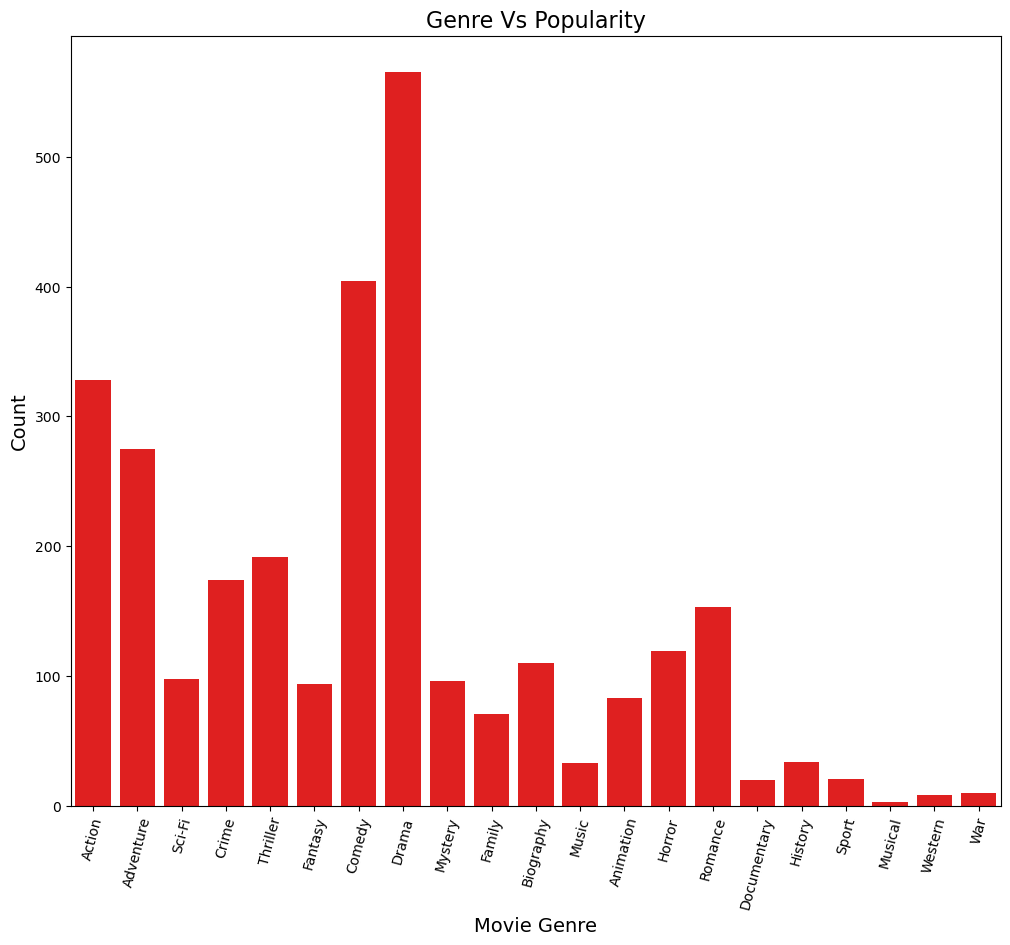

In [512]:
# Plotting the counts of each genre using a bar plot
plt.figure(figsize=(12, 10))
sns.barplot(x=genre, y=count, color='red')  

# Adding labels and title
plt.title('Genre Vs Popularity', fontsize=16)
plt.xlabel('Movie Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=75)

# Saving the plot as a PNG file
plt.savefig('Genres Vs Popularity.png')

plt.show()


 *Analyzing the bar graph, it's evident that Drama is the most popular genre in the movie industry, as indicated by the tallest bar.*


In [513]:
# Sorting the DataFrame final_df to find the popular movies per vote_average
# Sorting first by popularity in descending order, then by vote_average in descending order
# Selecting the top 10 movies based on popularity and vote_average
movie_ratings = final_df.sort_values(by=['popularity', 'vote_average'], ascending=(False, False)).head(10)

# Sorting the top 10 movies by vote_average in descending order
movie_ratings = movie_ratings.sort_values('vote_average', ascending=False).reset_index(drop=True)


In [514]:
# Extracting the columns 'movie', 'vote_average', and 'studio' from the DataFrame movie_ratings
# This provides information about highly rated movies along with their average votes and associated studios
movie_ratings.loc[:, ['movie', 'vote_average', 'studio']]


,movie,vote_average,studio
0,Avengers: Infinity War,8.3,BV
1,Guardians of the Galaxy,7.9,BV
2,Thor: Ragnarok,7.5,BV
3,Blade Runner 2049,7.4,WB
4,Spider-Man: Homecoming,7.4,Sony
5,The Hobbit: The Battle of the Five Armies,7.3,WB (NL)
6,Avengers: Age of Ultron,7.3,BV
7,John Wick,7.2,LG/S
8,Ant-Man and the Wasp,7.0,BV
9,Fantastic Beasts: The Crimes of Grindelwald,6.9,WB


In [515]:
# Getting the unique values in the 'studio' column of the DataFrame final_df
final_df['studio'].unique()

array(['BV', 'WB', 'Sony', 'WB (NL)', 'Uni.', 'Par.', 'Fox', 'P/DW',
       'STX', 'LGF', 'LG/S', 'TriS', 'Wein.', 'MBox', 'Free', 'Rela.',
       'EOne', 'FD', 'ORF', 'Sum.', 'SGem', 'Focus', 'Annapurna',
       'W/Dim.', 'Studio 8', 'MGM', 'MNE', 'BG', 'Strand', 'CBS', 'IFC',
       'ENTMP', 'RTWC', 'Gold.', 'FoxS', 'RAtt.', 'SPC', 'GrtIndia',
       'BST', 'VE', 'ALP', 'Anch.', 'EC', 'Over.', 'A24', 'Amazon',
       'OMNI/FSR', 'Magn.', 'Mira.', 'CE', 'KE', 'Saban', 'Global Road',
       'PFR', 'ATO', 'FCW', 'Neon', 'LD', 'ParV', 'Cohen', 'Alc', 'App.',
       'Relbig.', 'Cleopatra', 'Osci.', 'ELS', 'WHE', 'RLJ', 'TFA',
       'Eros', 'Jan.', 'Affirm', '3D', 'BH Tilt', 'SMod', 'IM', 'P4',
       'Drft.', 'PNT', 'Viv.', 'Orch.', 'LGP', 'Trib.', 'BBC'],
      dtype=object)

*Which studios have achieved high worldwide gross revenue and are considered the most popular in the industry?*

In [516]:
# Sorting the DataFrame final_df to find movies with the highest worldwide gross 
highest_gross = final_df.sort_values('worldwide_gross', ascending=False).head(10).reset_index(drop=True)
highest_gross

,movie,production_budget,worldwide_gross,studio,foreign_gross,year,popularity,vote_average,vote_count,runtime_minutes,genres
0,Insidious,"$1,500,000","$99,870,886",FD,43000000.0,2011,16.197,6.9,3582,103.0,"Horror,Mystery,Thriller"
1,Alpha,"$51,000,000","$99,624,873",Studio 8,62300000.0,2018,24.536,5.9,1167,116.0,Crime
2,Justin Bieber: Never Say Never,"$13,000,000","$99,034,125",Par.,26000000.0,2011,8.602,5.1,240,105.0,"Documentary,Music"
3,Philomena,"$12,000,000","$98,963,392",Wein.,62400000.0,2013,8.978,7.4,945,98.0,"Biography,Comedy,Drama"
4,Black Mass,"$53,000,000","$98,837,872",WB,37200000.0,2015,14.646,6.4,2020,123.0,"Biography,Crime,Drama"
5,The Visit,"$5,000,000","$98,677,816",Uni.,33200000.0,2015,10.196,6.2,2634,90.0,"Comedy,Drama,Romance"
6,Contraband,"$25,000,000","$98,406,855",Uni.,29700000.0,2012,12.357,6.2,1114,109.0,"Action,Crime,Drama"
7,Atomic Blonde,"$30,000,000","$98,345,423",Focus,48300000.0,2017,21.662,6.3,3645,115.0,"Action,Mystery,Thriller"
8,Another Happy Day,"$4,000,000","$978,527",P4,347000.0,2011,5.473,6.1,60,119.0,"Comedy,Drama"
9,Despicable Me 2,"$76,000,000","$975,216,835",Uni.,602700000.0,2013,19.014,6.9,7319,98.0,"Adventure,Animation,Comedy"


In [517]:
 #movies with the highest gross

highest_gross.loc[:,['movie','worldwide_gross']]

,movie,worldwide_gross
0,Insidious,"$99,870,886"
1,Alpha,"$99,624,873"
2,Justin Bieber: Never Say Never,"$99,034,125"
3,Philomena,"$98,963,392"
4,Black Mass,"$98,837,872"
5,The Visit,"$98,677,816"
6,Contraband,"$98,406,855"
7,Atomic Blonde,"$98,345,423"
8,Another Happy Day,"$978,527"
9,Despicable Me 2,"$975,216,835"


In [518]:
import matplotlib.ticker as mticker

C:\Users\USER PC\AppData\Local\Temp\ipykernel_14888\401565671.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels = y,fontsize=14)


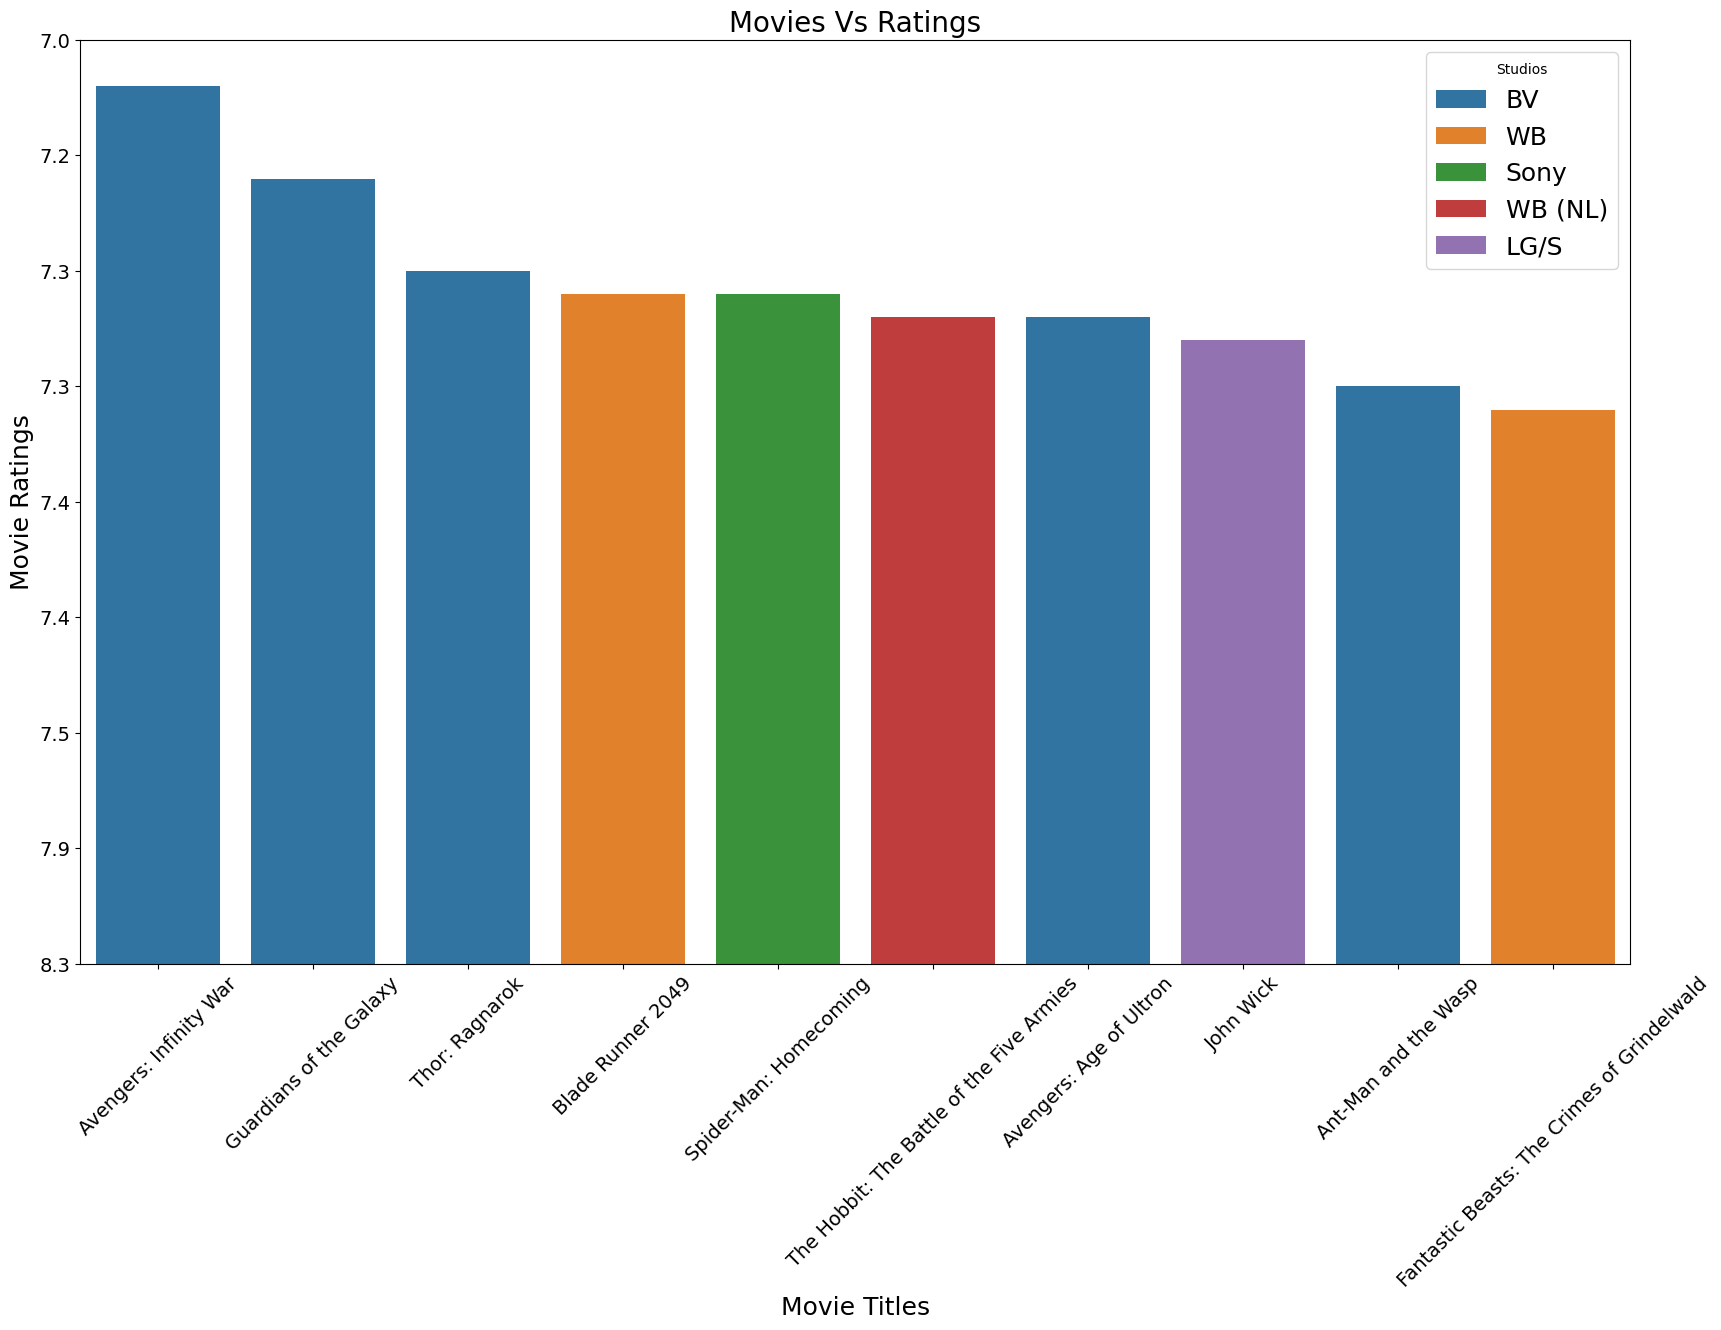

In [519]:
# Plotting the movies against their ratings, with each movie grouped by studio, using a bar plot 
# Using seaborn for visualization
# plotting the data above

fig, ax1= plt.subplots(figsize=(20,12))

x = list(movie_ratings['movie'].values)
y = movie_ratings['vote_average']

ax1 = sns.barplot(data = movie_ratings, x = 'movie', y = 'vote_average', hue = 'studio', ax = ax1, dodge=False)

ax1.set_title('Movies Vs Ratings', fontsize=20)
ax1.set_xlabel("Movie Titles",fontsize=18)
ax1.set_ylabel("Movie Ratings", fontsize=18)
ax1.legend(title='Studios', fontsize=18, loc=1)
ax1.set_xticklabels(labels = x, rotation = 60,fontsize=14)
ax1.set_yticklabels(labels = y,fontsize=14)

ax1.set_xticklabels(labels = x, rotation = 45)
ax1.set_ylim(4.5, 8.5)
fig.savefig('Movies Vs Ratings per studio.png')


*According to the bar graph, it's evident that BV studios has produced highly rated movies, with 'Avengers' and 'Guardians of the Galaxy' standing out as the top two movies in terms of ratings.*

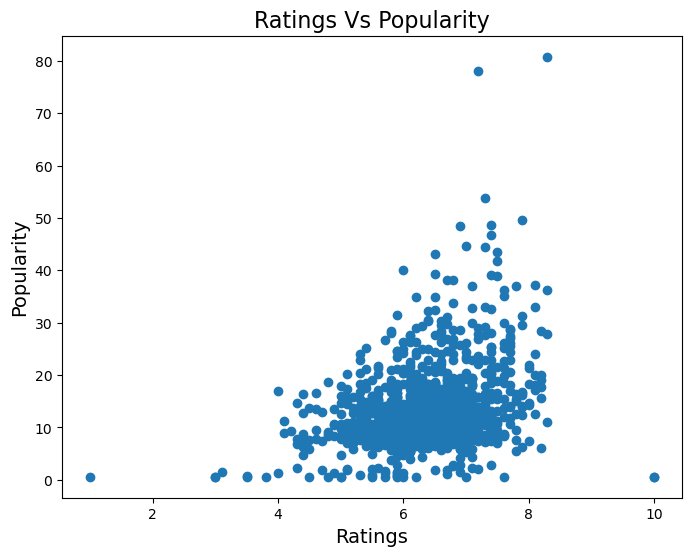

In [526]:
#correlation between a movie's popularity and its rating?"
#scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = final_df['vote_average']
y = final_df['popularity']

ax.scatter(x,y)

ax.set_title('Ratings Vs Popularity', fontsize=16)
ax.set_xlabel("Ratings",fontsize=14)
ax.set_ylabel("Popularity", fontsize=14)
fig.savefig('Ratings vs Popularity.png');

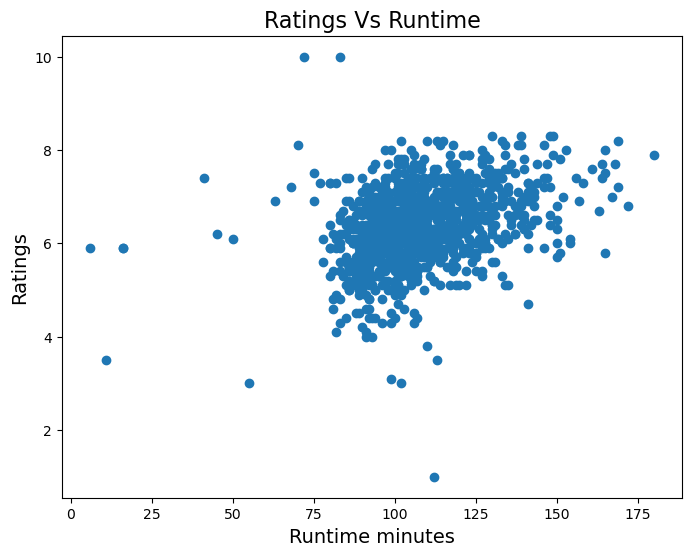

In [527]:
#relationship between a movie's runtime minutes and its popularity?"
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = final_df['runtime_minutes']
y = final_df['vote_average']

ax.scatter(x,y)

ax.set_title('Ratings Vs Runtime', fontsize=16)
ax.set_ylabel("Ratings",fontsize=14)
ax.set_xlabel("Runtime minutes", fontsize=14)
fig.savefig('Ratings vs Runtime.png');

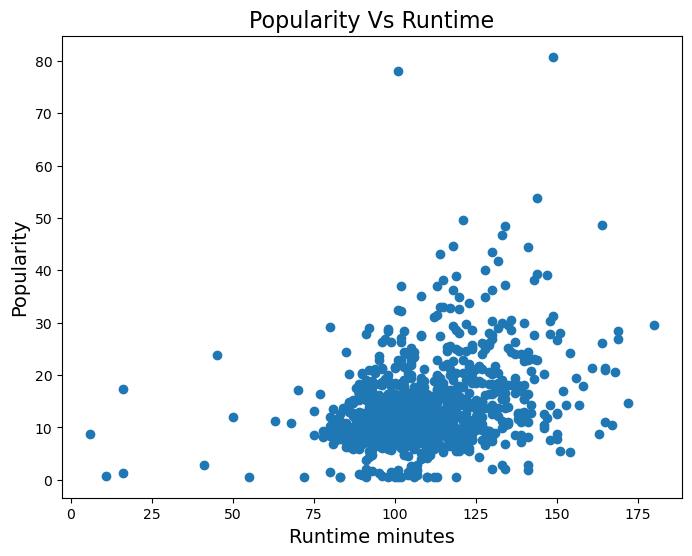

In [528]:
#correlation between a movie's runtime duration vs popularity?
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x= final_df['runtime_minutes'] 
y= final_df['popularity']


ax.scatter(x,y)

ax.set_title('Popularity Vs Runtime', fontsize=16)
ax.set_ylabel("Popularity",fontsize=14)
ax.set_xlabel("Runtime minutes", fontsize=14)
fig.savefig('Popularity vs Runtime.png');

1. Budget Allocation: Carefully allocate budgets by considering factors such as target audience, genre, and market demand. While higher budgets can enhance production value and attract viewers, it's essential to ensure that budget allocation aligns with the specific requirements of each film.
2. Analyze the revenue potential and audience preferences across different genres. Tailor film production strategies to capitalize on genres that resonate with the audience and align with the strengths of the production studio.
3. Explore collaborative opportunities with established studios, directors, industry professionals, and actors renowned for their success in the box office. Partnering with individuals and entities with a proven track record can enhance the film's marketability and performance.